In [76]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
import copy
from datetime import datetime

In [62]:
night=Image.open('vangogh-starry-night.png')
w, h = night.size
reduced=np.array(night)/255
vecs=reduced.reshape(7644,5,5).reshape(7644,25)

In [85]:
class KmeanVQ:
    def __init__(self,data,init='rand',C=3):
        self.data=data
        self.init=init
        self.C=C
        self.labels=np.zeros(len(data))
        self.colors=['r','g','b','cyan','magenta','purple','k']
        self.Cov=np.cov(self.data)
        if self.init=='rand':
            self.Random()
            self.mean()
        elif self.init=='forgy':
            self.Forgy()
            self.cluster()
        elif self.init=='K++':
            self.Kpp()
            self.cluster()
        else:
            print('Initialization type not recognized defaulting to random')
            self.init='rand'
            self.Random()
            self.mean()
    def Random(self):
            self.mu=[[-1,-1]]*self.C
            y=np.random.randint(0,self.C,len(self.labels))
            test=1
            for i in range(self.C):
                test*=len(np.where(y==i)[0])
            if test==0:
                while test==0:
                    y=np.random.randint(0,self.C,len(self.labels))
                    test=1
                    for i in range(self.C):
                        test*=len(np.where(y==i)[0])
            self.labels=y
    def Forgy(self):
        self.mu=[]
        sample=[]
        while len(np.unique(sample))!=self.C:
            sample=np.random.randint(0,len(self.data),self.C)
        for a in sample:
            muk=list(self.data[a].values())
            self.mu.append(muk)       
    def Kpp(self):
        self.mu=[]
        self.mu.append(self.data[np.random.randint(0,len(self.data))])
        while len(self.mu)!=self.C:
            prob=np.zeros(len(self.data))
            for i in range(len(self.data)):
                t=[0]*len(self.mu)
                for k in range(len(self.mu)):
                    t[k]=self.Dist2(self.data[i],self.mu[k])**2
                prob[i]=min(t)
            prob/=sum(prob)
            s=np.random.choice(np.arange(0,len(prob),1),p=prob)
            self.mu.append(self.data[s])
    def Dist2(self,x,y):
        d=np.sum((x-y)**2)
        return d
    def cluster(self):
        for i in range(len(self.data)):
            t=[0]*self.C
            for k in range(self.C):
                t[k]=self.Dist2(self.data[i],self.mu[k])
            self.labels[i]=np.argmin(t)
    def mean(self):
        for c in range(self.C):
            z=np.where(self.labels==c)
            muk=[np.mean(self.data[z],axis=0)]
            self.mu[c]=muk
    def Loss(self,norm=False):
        E=0
        for c in range(self.C):
            z=np.where(self.labels==c)
            for i in z[0]:
                E+=self.Dist2(self.data[i],self.mu[c])
        if norm:
            return E/np.trace(self.Cov)
        else:
            return(E)
    def run(self,itt=100):
        for i in range(itt):
            print('Itteration',i,'Time: ', datetime.now().strftime("%H:%M:%S"),'Loss: ',self.Loss(norm=True),end='\n')
            self.oldmu = copy.deepcopy(self.mu)
            self.mean()
            self.cluster()
            #self.plot()
            if np.array_equal(self.oldmu,self.mu):
                print('Convergence Reached',i,' Itterations')
                break
            if i ==itt-1:
                print('Max Itteration Reached')

In [86]:
K=KmeanVQ(vecs,'K++',C=100)
K.run()

Itteration 0 Time:  01:49:20 Loss:  23.367658632325572
Itteration 1 Time:  01:49:28 Loss:  17.49131875657672
Itteration 2 Time:  01:49:36 Loss:  16.7201381455717
Itteration 3 Time:  01:49:45 Loss:  16.393073642866117
Itteration 4 Time:  01:49:53 Loss:  16.220525982713404
Itteration 5 Time:  01:50:01 Loss:  16.133372996502136
Itteration 6 Time:  01:50:09 Loss:  16.073248694747463
Itteration 7 Time:  01:50:18 Loss:  16.025609113734312
Itteration 8 Time:  01:50:26 Loss:  15.996974784953526
Itteration 9 Time:  01:50:34 Loss:  15.978280141413803
Itteration 10 Time:  01:50:42 Loss:  15.964202968497746
Itteration 11 Time:  01:50:50 Loss:  15.952449416555522
Itteration 12 Time:  01:50:59 Loss:  15.941129241578345
Itteration 13 Time:  01:51:07 Loss:  15.934556630280065
Itteration 14 Time:  01:51:15 Loss:  15.93042320242224
Itteration 15 Time:  01:51:23 Loss:  15.926179852930824
Itteration 16 Time:  01:51:32 Loss:  15.923525796849455
Itteration 17 Time:  01:51:40 Loss:  15.920734584650102
Ittera

In [88]:
comp=[]
for i in range(len(vecs)):
    comp.append(K.mu[int(K.labels[i])])

In [89]:
img=np.array(comp).reshape(7644,5,5).reshape(h,w)

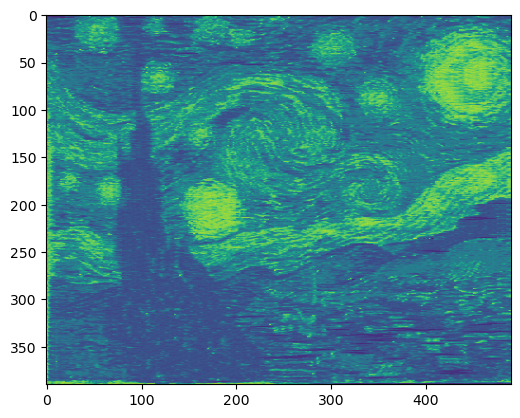

In [90]:
plt.imshow(img)

In [ ]:
print(datetime.now().strftime("%H:%M:%S"))
K2=KmeanVQ(vecs,'K++',C=1000)
K2.run(itt=1000)

09:50:01
